In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from tqdm.notebook import tqdm

In [198]:
mu = 0
s = 1
degree = 3
N = 14 # number of data points
cost_train = []
cost_test = []


In [199]:
def data_split(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
#     X = np.array(X)
#     y = np.array(y)
    X1 = []
    y1 = []
    shufle = np.random.permutation(len(X))
    for i in shufle:
        X1.append(X[i])
        y1.append(y[i])
    X1 = np.array(X1)
    y1 = np.array(y1)
    sp = int(len(X)*(1-test_size))
    X_train = X1[:sp]
    X_test = X1[sp:]
    y_train = y1[:sp]
    y_test = y1[sp:]
    return X_train, X_test, y_train, y_test

In [200]:
def poly(x,degree):
    x = x.reshape(-1,1)
    for i in range(2,degree+1):
        x = np.c_[x, x[:,0]**i]
#     x = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=False).fit_transform(x)
    return x

In [201]:
def normalize(x):
    global mu, s
    mu = x.mean(axis=0)
    s = np.std(x,axis=0)
    return (x-mu)/s


In [202]:
def predict(x):
    global mu, s
    x = np.array(x)
    x = poly(x, degree)
    x = (x-mu)/s
    x = np.c_[np.ones(len(x)),x]
    return x.dot(w)

In [203]:
def plot_data():
    plt.scatter(X_train, y_train,marker='o',s=20)
    plt.scatter(X_test, y_test,marker='o',s=20)
    plt.ylim(-1.5,1.5)
    plt.xlabel('Age')
    plt.ylabel('Price')

In [204]:
def plot_regression_model():
    xx = np.arange(X.min()-0.2, X.max()+0.2, 0.01).reshape(-1,1) 
    yy = predict(xx)
    plt.plot(xx, 1.0*np.sin(f*xx+0.001), '--', label='Base')
    plt.plot(xx,yy,c='red', label='model')

In [205]:
def fit_neq(X, y):
    X = poly(X, degree)
    X = normalize(X)
    X = np.c_[np.ones(len(X)),X]
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

In [206]:
def fit(X, y): #, X1, y1):
    m = len(X)

    tolerance = 1e-15
    alpha = 0.2

    y = y.reshape(-1,1)
    X = poly(X, degree)
    X = normalize(X)
    X = np.c_[np.ones(len(X)),X]
    
    w = np.zeros((X.shape[1],1))

    for epoch in tqdm(range(1000000)):
        y_hat = X.dot(w)
        J = ((y_hat - y) ** 2).sum()/(2*m)
        g = X.T.dot(y_hat-y)/m

        w -= alpha*g

        if alpha*np.abs(g.mean())<=tolerance:
            print('epoch = ',epoch,'\tGradient = ',alpha*np.abs(g.mean()))
            break
    return w

In [207]:
# Generating data
np.random.seed(3)
f = 1.05
X = np.linspace(0, 2*np.pi, N)
y = 1.0*np.sin(X+0.001) + 0.15*np.random.randn(N) # create artificial data with noise
#X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=19)
X_train,X_test,y_train,y_test=data_split(X, y, test_size=0.25, random_state=8)

Cost train =  3.6517246482515313
Cost test  =  2.319448373436471


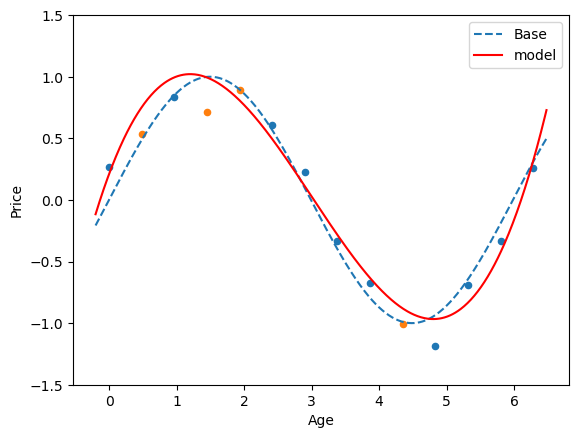

In [208]:
w = fit_neq(X_train, y_train) #, X_test, y_test)

J_train = ((predict(X_train) - y_train.reshape(-1,1)) ** 2).sum()/(2*len(X_train))
J_test = ((predict(X_test) - y_test.reshape(-1,1)) ** 2).sum()/(2*len(X_test))

print('Cost train = ', J_train)
print('Cost test  = ', J_test)

plot_data()
plot_regression_model()
plt.legend()
plt.show()